In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
figure_directory = '/home/flanigan/temp/'

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-04-17_173547_scan.npd/')

In [5]:
scan = npd.Scan0
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
len(scan.sweep_arrays)

40

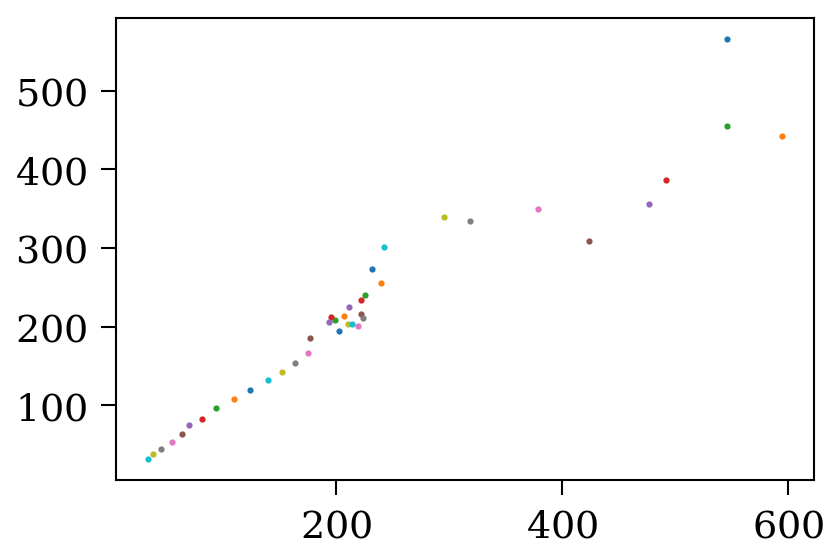

In [7]:
fig, ax = plt.subplots()
for snap in snaps:
    ax.plot(snap.x.ptp(), snap.y.ptp(), '.')

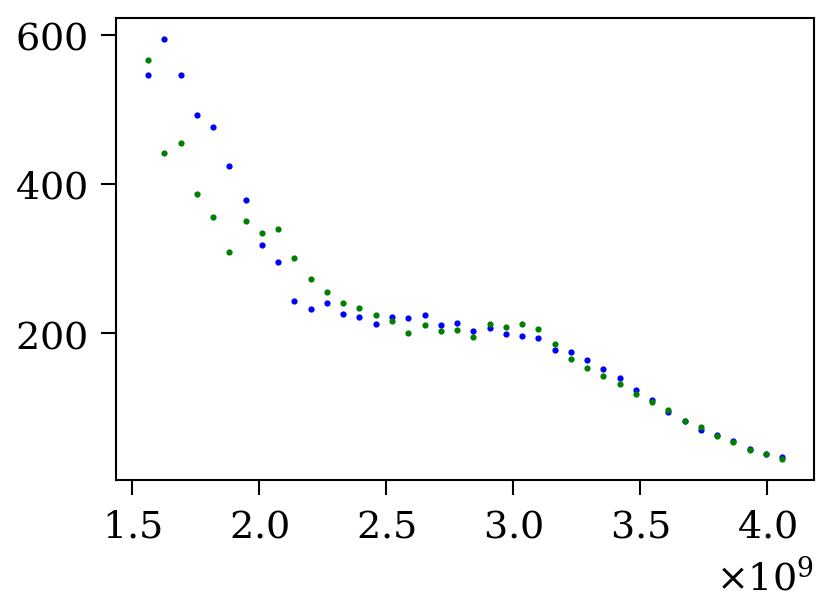

In [8]:
fig, ax = plt.subplots()
for sweep, snap in zip(scan.sweep_arrays, snaps):
    ax.plot(sweep.frequency.mean(), snap.x.ptp(), '.b')
    ax.plot(sweep.frequency.mean(), snap.y.ptp(), '.g')

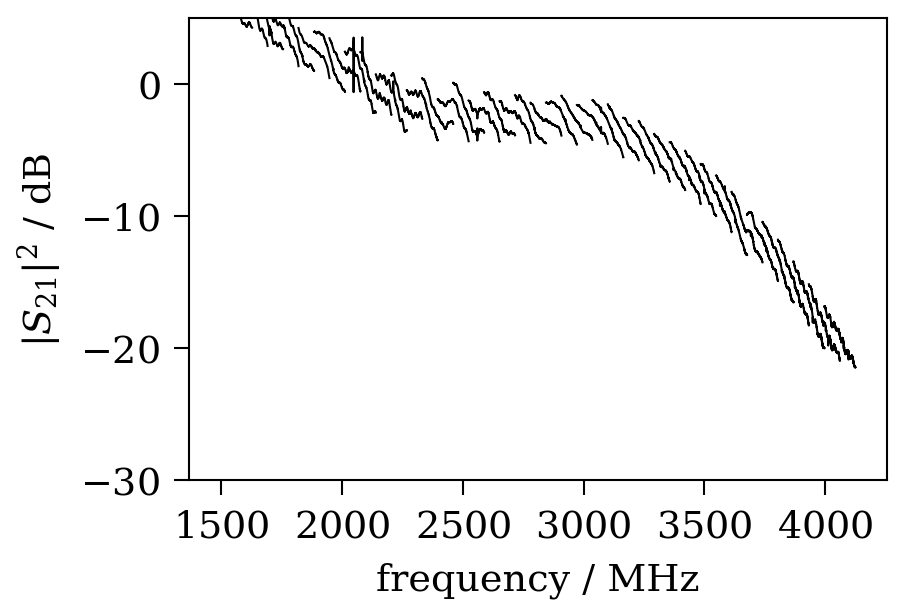

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')

for sweep in scan.sweep_arrays:
    ax.plot(sweep.frequency_MHz, 20 * np.log10(np.abs(sweep.s21_point)), '-k')
ax.set_ylim(-30, 5);

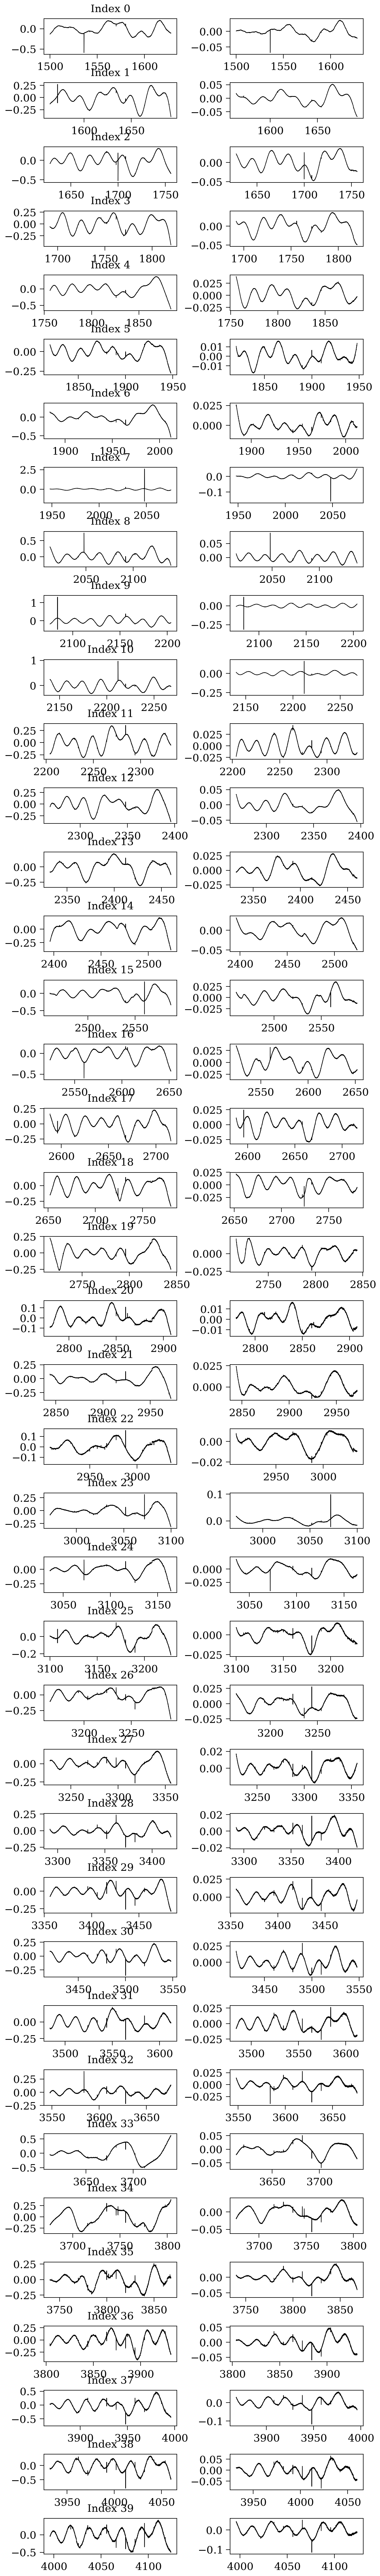

In [10]:
num_sweeps = len(scan.sweep_arrays)
fig, axes = plt.subplots(num_sweeps, 2, figsize=(5, num_sweeps), gridspec_kw={'wspace': 0.4, 'hspace': 0.8})
for index, (sweep, (amp_ax, phi_ax)) in enumerate(zip(scan.sweep_arrays, np.atleast_2d(axes))):
    amp_ax.set_title('Index {:d}'.format(index))
    amp_ax.plot(sweep.frequency_MHz, 20 * np.log10(np.abs(sweep.s21_point_foreground)), '-k')
    phi_ax.plot(sweep.frequency_MHz, np.angle(sweep.s21_point_foreground), '-k')